In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [20]:
train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_y_df=pd.read_csv('./datasets/titanic_gender_submission.csv')

In [21]:
train = train_df[['Pclass' , 'Sex' , 'Age' ,'Survived']]
test = test_df[['Pclass' , 'Sex' , 'Age' ]]
test_y = test_y_df['Survived']

In [22]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [23]:
train = train.dropna(axis=0)

In [24]:
# Sex Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex']=data

In [25]:
# Age Scalering
scaler = MinMaxScaler()
data = scaler.fit_transform(train[['Age']])
train['Age'] = data

In [26]:
X = train.drop('Survived' ,axis=1)
y = train['Survived']
lr = LogisticRegression()

lr.fit(X, y)

LogisticRegression()

In [27]:
# test data preprocessing
test = test.fillna(np.mean(test['Age']))

# Sex Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex']=data

# Age Scalering
scaler = MinMaxScaler()
data = scaler.fit_transform(test[['Age']])
test['Age'] = data

In [28]:
pred = lr.predict(test)

### accuracy_score, recall_score, precision_score, f1_score, cofusion_matrix

#### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
 
#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
 
#### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def get_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)
    
    print(f'혼돈 행렬은 : {matrix}')
    print(f'정확도 : {accuracy}, 재현율 : {recall}, 정밀도 : {precision}, f1스코어 : {f1score}')

In [30]:
get_eval(test_y, pred)

혼돈 행렬은 : [[252  14]
 [ 10 142]]
정확도 : 0.9425837320574163, 재현율 : 0.9342105263157895, 정밀도 : 0.9102564102564102, f1스코어 : 0.922077922077922


In [31]:
pred_proba = lr.predict_proba(test)

In [32]:
pred = lr.predict(test)

In [33]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [34]:
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(test_y, pred_proba[:, 1])

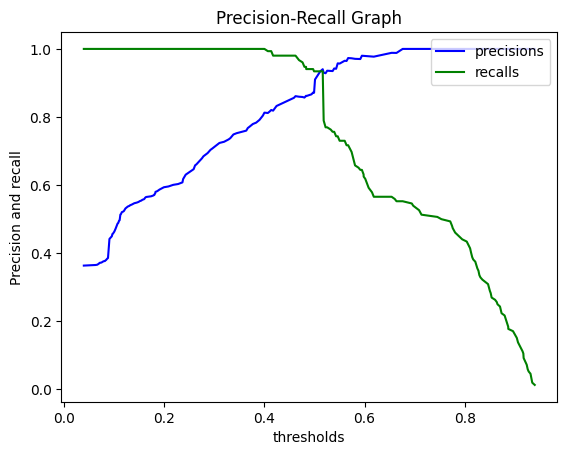

In [38]:
import matplotlib.pyplot as plt

plt.title("Precision-Recall Graph")
plt.xlabel("thresholds"   )
plt.ylabel("Precision and recall")
plt.plot(thresholds, precisions[:len(precisions)-1], "b", label = "precisions")
plt.plot(thresholds, recalls[:len(recalls)-1], "g", label = "recalls")
plt.legend(loc = "upper right")
plt.show()